## Data Wrangling 

In [5]:
Problem Statement: Data Wrangling on Real Estate Market 
Dataset: "RealEstate_Prices.csv" 
Description: The dataset contains information about housing prices in a specific real estate 
market. It includes various attributes such as property characteristics, location, sale prices, 
and other relevant features. The goal is to perform data wrangling to gain insights into the 
factors influencing housing prices and prepare the dataset for further analysis or modeling. 
Tasks to Perform: 

SyntaxError: invalid syntax (1890910726.py, line 1)

### 1.  Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, special characters, or renaming them for clarity

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 

C:\Users\PRAFULL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
df=pd.read_csv(r"C:\Users\PRAFULL\OneDrive\Desktop\Retail_Sales_Data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  100 non-null    object 
 1   Region            100 non-null    object 
 2   Product Category  100 non-null    object 
 3   Quantity Sold     96 non-null     float64
 4   Sales Amount      100 non-null    float64
 5   Customer Name     100 non-null    object 
 6   Transaction ID    100 non-null    object 
 7   Payment Method    100 non-null    object 
dtypes: float64(2), object(6)
memory usage: 6.4+ KB


In [9]:
df.head()

,Transaction Date,Region,Product Category,Quantity Sold,Sales Amount,Customer Name,Transaction ID,Payment Method
0,16-01-19,West,Home Decor,9.0,909.84,Melinda Pham,7b094307-bcd3-4f16-84a7-2bca783fff4f,Credit Card
1,17-09-21,North,Clothing,8.0,900.29,Shelly Perez,fb437a2e-4ebf-4807-b84e-f2dfae83541a,Credit Card
2,27-03-20,East,Electronics,3.0,506.07,Scott White,b6ead965-ed1c-4bdc-95ac-864685467abd,Online Banking
3,11-02-19,South,Clothing,9.0,744.70,Gloria Williams,400773f4-a820-47b6-b3c4-2cc2a5467e73,Cash
4,15-01-20,East,Books,4.0,245.55,Michael Sims,10b62e7a-38f8-4f27-a989-b99b55d76223,Cash


In [10]:
# Example of cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
0,16-01-19,West,Home Decor,9.0,909.84,Melinda Pham,7b094307-bcd3-4f16-84a7-2bca783fff4f,Credit Card
1,17-09-21,North,Clothing,8.0,900.29,Shelly Perez,fb437a2e-4ebf-4807-b84e-f2dfae83541a,Credit Card
2,27-03-20,East,Electronics,3.0,506.07,Scott White,b6ead965-ed1c-4bdc-95ac-864685467abd,Online Banking
3,11-02-19,South,Clothing,9.0,744.70,Gloria Williams,400773f4-a820-47b6-b3c4-2cc2a5467e73,Cash
4,15-01-20,East,Books,4.0,245.55,Michael Sims,10b62e7a-38f8-4f27-a989-b99b55d76223,Cash


#### 2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., imputation or removal). 

In [11]:
df.isnull().sum()

transaction_date    0
region              0
product_category    0
quantity_sold       4
sales_amount        0
customer_name       0
transaction_id      0
payment_method      0
dtype: int64

In [12]:
# Calculate mean_value
mean_value = df['quantity_sold'].mean()

# Fill missing values in 'quantity_sold' column with mean_value
df['quantity_sold'].fillna(mean_value, inplace=True)


C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_13512\3784656878.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity_sold'].fillna(mean_value, inplace=True)


In [13]:
df.isnull().sum()

transaction_date    0
region              0
product_category    0
quantity_sold       0
sales_amount        0
customer_name       0
transaction_id      0
payment_method      0
dtype: int64

#### 3. Perform data merging if additional datasets with relevant information are available (e.g., neighborhood demographics or nearby amenities). 

In [14]:
newdf = df.copy()
newdf['transaction_id'] = newdf['transaction_id'] + ', ' + newdf['payment_method']
newdf

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
0,16-01-19,West,Home Decor,9.0,909.84,Melinda Pham,"7b094307-bcd3-4f16-84a7-2bca783fff4f, Credit Card",Credit Card
1,17-09-21,North,Clothing,8.0,900.29,Shelly Perez,"fb437a2e-4ebf-4807-b84e-f2dfae83541a, Credit Card",Credit Card
2,27-03-20,East,Electronics,3.0,506.07,Scott White,"b6ead965-ed1c-4bdc-95ac-864685467abd, Online B...",Online Banking
3,11-02-19,South,Clothing,9.0,744.70,Gloria Williams,"400773f4-a820-47b6-b3c4-2cc2a5467e73, Cash",Cash
4,15-01-20,East,Books,4.0,245.55,Michael Sims,"10b62e7a-38f8-4f27-a989-b99b55d76223, Cash",Cash
...,...,...,...,...,...,...,...,...
95,26-06-20,East,Electronics,3.0,914.06,Erica Franklin DVM,"56855833-4f68-4312-b5e0-88c7dc7ce72b, Online B...",Online Banking
96,04-07-21,South,Electronics,3.0,652.93,Ricky Walsh,"7e03f607-9b90-4075-b05f-e704c81fb165, PayPal",PayPal
97,08-04-20,North,Books,9.0,640.88,Luis Wong,"4f1f1533-6fb0-468d-80ac-a8c1db865b1a, Online B...",Online Banking
98,24-12-21,East,Electronics,1.0,727.21,Christopher Reese,"0c3d09c3-469c-4b2f-860e-89365bab7f88, Online B...",Online Banking


### 4. Filter and subset the data based on specific criteria, such as a particular time period, property type, or location. 

In [15]:
#filter and subset data
filtered_df = df[(df['region'] == 'West') & (df['sales_amount'] > 900)]
filtered_df

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
0,16-01-19,West,Home Decor,9.0,909.84,Melinda Pham,7b094307-bcd3-4f16-84a7-2bca783fff4f,Credit Card
42,14-07-20,West,Books,3.0,966.72,Pamela Cardenas,88a85b10-1fbc-4c93-8d11-d84fdd1fc31c,PayPal
44,12-11-20,West,Clothing,4.0,973.21,Jason Porter,1e4999ef-d5c9-4cf8-99c0-fd53139c71d5,Credit Card
45,01-09-20,West,Home Decor,10.0,917.06,Suzanne Bennett,fda2dc0c-fbea-45bb-b8ef-9d78142d1392,Credit Card
47,13-11-21,West,Books,5.0,984.85,Scott Nixon,1e48739d-f2fb-489d-9454-c7ba02980f92,PayPal


### 5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or  encoding) for further analysis.

In [16]:
df1 = pd.get_dummies(df, columns=['payment_method', 'region', 'customer_name','product_category'], drop_first=True)
df1

,transaction_date,quantity_sold,sales_amount,transaction_id,payment_method_Credit Card,payment_method_Online Banking,payment_method_PayPal,region_North,region_South,region_West,...,customer_name_Thomas Wong,customer_name_Veronica Murray,customer_name_Victoria Summers,customer_name_Wesley Harrington,customer_name_Whitney Knight,customer_name_William Figueroa,customer_name_William Sanchez,product_category_Clothing,product_category_Electronics,product_category_Home Decor
0,16-01-19,9.0,909.84,7b094307-bcd3-4f16-84a7-2bca783fff4f,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,17-09-21,8.0,900.29,fb437a2e-4ebf-4807-b84e-f2dfae83541a,True,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,27-03-20,3.0,506.07,b6ead965-ed1c-4bdc-95ac-864685467abd,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11-02-19,9.0,744.70,400773f4-a820-47b6-b3c4-2cc2a5467e73,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,15-01-20,4.0,245.55,10b62e7a-38f8-4f27-a989-b99b55d76223,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,26-06-20,3.0,914.06,56855833-4f68-4312-b5e0-88c7dc7ce72b,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
96,04-07-21,3.0,652.93,7e03f607-9b90-4075-b05f-e704c81fb165,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
97,08-04-20,9.0,640.88,4f1f1533-6fb0-468d-80ac-a8c1db865b1a,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
98,24-12-21,1.0,727.21,0c3d09c3-469c-4b2f-860e-89365bab7f88,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### 6.Aggregate the data to calculate summary statistics or derived metrics such as average sale prices by neighborhood or property type.

In [19]:
average_sale_price_by_location = df.groupby('region')['sales_amount'].mean()
average_sale_price_by_location

region
East     532.677037
North    501.220769
South    513.651364
West     630.919200
Name: sales_amount, dtype: float64

### 7. Identify and handle outliers or extreme values in the data that may affect the analysis or modeling process. 

<Axes: >

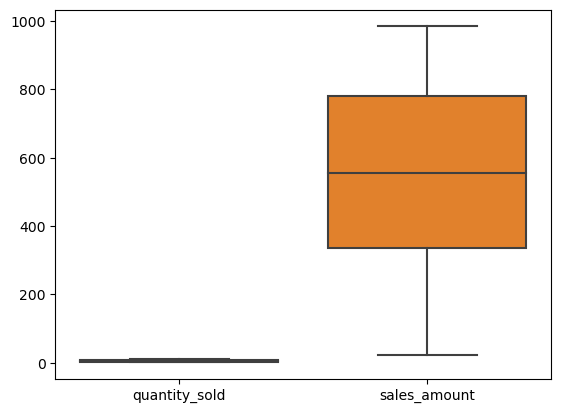

In [23]:

sns.boxplot(df)

In [25]:
def handle_outliers_with_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return data, outliers


In [27]:
df, outliers = handle_outliers_with_iqr(df, 'sales_amount')
outliers

# as we can see in box plot there are no outliers might be because the dataset was already preprocessed

,transaction_date,region,product_category,quantity_sold,sales_amount,customer_name,transaction_id,payment_method
